**Algorithmes récursifs**

[<img align="center" width="25%" src="1280px-Russian-Matroshka_no_bg.jpg"/>](1280px-Russian-Matroshka_no_bg.jpg)



**Objectifs**

* Découvrir une autre forme d’expression d’algorithmes
* Plusieurs types de récursivité
* La récursivité en Python

# Quelques problèmes

## Dériver une fonction 

Le calcul de l'expression de la fonction dérivée d'une fonction dérivable d'un intervalle $I$ dans $\mathbb{R}$ s'effectue en connaissant par cœur les dérivées d'un certain nombre de fonctions de bases (puissances, fonctions trigonométriques, ...) et quelques règles de dérivation.

Fonctions de base
* $f(x) = x^n$, $n\in\mathbb{N}$ : $f'(x) = nx^{n-1}$
* $f(x) = \frac{1}{x}$ : $f'(x) = -\frac{1}{x^2}$
* $f(x) = \sqrt{x}$ : $f'(x) = \frac{1}{2\sqrt{x}}$
* $f(x) = \ln{x}$ : $f'(x) = \frac{1}{x}$
* $f(x) = \sin{x}$ : $f'(x) = \cos{x}$
* ...

Règles de dérivation

* somme : $(u + v)' = u' + v'$
* produit par un scalaire : $(c.u)' = c.u'$
* produit : $(u.v)' = u'.v + u.v'$
* quotient : $(\frac{u}{v})' = \frac{u'.v - u.v'}{v^2}$
* composition : $(v\circ u)' = (v'\circ u).u'$
* ...

Remarquons que les régles de récursivation s'expriment toutes sous la forme

* si la fonction peut se décomposer de telle façon, alors combiner les dérivées des composantes de telle façon.

## Les tours de Hanoi

Le problème mathématique des tours de Hanoï a été inventé par Édouard Lucas. Il est publié dans le tome 3 de ses *Récréations mathématiques*, parues à titre posthume en 1892. Il annonce que ce problème est dû à un de ses amis, N. Claus de Siam (anagramme de Lucas d'Amiens, Amiens étant sa ville de naissance), prétendument professeur au collège de Li-Sou-Stian (anagramme de Saint Louis, le lycée où Lucas enseignait).

> Un de nos amis, le professeur N. Claus (de Siam), mandarin du collège Li-Sou-Stian, a publié à la fin de l’année dernière, 
> un jeu inédit qu’il a appelé la Tour d’Hanoï, véritable casse-tête annamite qu’il n’a pas rapporté du Tonkin, quoiqu’en dise 
> le prospectus. Cette tour se compose d’étages superposés et décroissants, en nombre variable, représentés par huit pions en 
> bois percés à leur centre, et enfilés dans l’un des trois clous fixés sur une tablette. Le jeu consiste à déplacer la tour 
> en enfilant les pions sur un des deux autres clous et en ne déplaçant qu’un seul étage à la fois, mais avec défense expresse 
> de poser un étage sur un autre plus petit.

![Tours de Hanoi](tour_hanoi.png) 
(source texte cité et image : Récréations mathématiques, vol 3, Édouard Lucas)


La figure ci-dessous montre les sept étapes permettant de résoudre le problème des tours de Hanoi à 3 disques.

![Solution du problème des tours de Hanoi à 3 disques](hanoi3-sol.png)

Et celle-ci donne les quinze étapes pour le problème à 4 disques.

![Solution du problème des tours de Hanoi à 4 disques](hanoi4-sol.png)

**Recherche d'un algorithme général de résolution**

Pour résoudre le problème général à $n\geq 1$ disques, il va être nécessaire de déplacer le plus grand des disques depuis la tour A vers la tour C. 
Pour cela, il faut mettre tous les disques de tailles plus petites sur la tour intermédiaire B tout en respectant les contraintes imposées par le jeu. Autrement dit il faut résoudre un problème analogue, avec un disque de moins, mais dans lequel la tour d'arrivée est la tour B.

Supposons cela réalisé.

![](hanoi10-511.png)

On peut alors déplacer le plus grand des disques.

![](hanoi10-512.png)

Il ne reste plus qu'à déplacer les disques situés sur la tour B pour les amener sur la tour C au dessus du grand disque. Cette étape est encore un problème analogue au problème initial avec $n-1$ disques et la tour B comme tour de départ.

![](hanoi10-1023.png)

En désignant par `resoud_hanoi(n, depart, arrivee)` le problème des tours de Hanoi à $n$ disques situés sur la tour  `depart` devant être amenés sur la tour `arrivee`,
nous pouvons donner une formulation *récursive* d'une résolution algorithmique de ce problème :

     resoud_hanoi(n, depart, arrivee)
         si n > 0
            intermediaire = autre_tour(depart, arrivee)
            resoud_hanoi(n - 1, depart, intermediaire)
            déplacer le grand disque depuis depart jusque arrivee
            resoud_hanoi(n - 1, intermediaire, arrivee)

Dans cette formulation, la fonction `autre_tour` est chargée de déterminer la tour intermédiaire, c'est-à-dire la tour autre que celles désignées par `depart` et `arrivee`.

## Factorielle

Terminons avec l'exemple classique du calcul de la factorielle d'un nombre entier naturel $n$. Rappelons que ce nombre, noté $n!$ est le produit de tous les entiers compris entre 1 et $n$.
$$ n! = 1\times 2\times\ldots\times n.$$
Pour $n=0$, on pose $0! = 1$.

Il est facile de vérifier que, pour un entier $n\geq 1$ on a
$$ n! = n\times (n-1)!.$$
Cette relation permet de calculer récursivement la factorielle de n'importe quel nombre.

Par exemple, avec $n=4$ on peut écrire
$$ 4! = 4\times 3!.$$
Le calcul de $4!$ se ramène donc au calcul de $3!$. Mais on peut écrire
$$ 3! = 3\times 2!,$$
et le calcul de $3!$ conduit à celui de $2!$.  Qui se poursuit de la même façon en écrivant
\begin{align*}
  2! &= 2\times 1!\\
  1! &= 1\times 0!.
\end{align*}
On en est donc arrivé au calcul de $0!$. Mais nous savons que $0!=1$. On peut donc terminer le calcul en écrivant
\begin{align*}
  1! &= 1\times 0! = 1\\
  2! &= 2\times 1! = 2\\
  3! &= 3\times 2! = 6\\
  4! &= 4\times 3! = 24.
\end{align*}
Ainsi $4!=24$.

Nous pouvons formuler récursivement l'algorithme de calcul de la factorielle d'un nombre $n$ par

    fact(n)
        si n=0 alors
           n! = 1
        sinon
           n! = n * fact(n-1)

# Généralités sur les algorithmes récursifs

## Définition

Un algorithme de résolution d’un problème $P$ sur une donnée $a$ est dit *récursif* si parmi les opérations utilisées pour le résoudre, on trouve la résolution du même problème $P$ sur une donnée $b$. Dans un algorithme récursif, on nomme *appel récursif* toute étape de l’algorithme résolvant le même problème sur une autre donnée.

En Python, les algorithmes récursifs peuvent être tout simplement exprimés par des fonctions qui font appel à elle-même.

In [ ]:
def fact(n):
    if n == 0:
        res = 1
    else:
        res = n * fact(n-1)
    return res

In [2]:
[fact(n) for n in range(10)]

[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880]

Dans la fonction `fact` ci-dessus, il y a un *appel récursif* à `fact` : `fact(n-1)`.

## Principes de conception

In [3]:
def fact_mauvais1(n):
    return n * fact_mauvais1(n-1)

In [4]:
fact_mauvais1(4)

RecursionError: maximum recursion depth exceeded

**Règle 1 :**

> Tout algorithme récursif doit distinguer plusieurs cas dont l’un au moins ne doit pas contenir 
> d’appels récursifs. sinon il y a risque de cercle vicieux et de calcul infini.

Une conséquence de cette règle est que beaucoup d'algorithme récursif s'expriment sous forme d'une instruction conditionnelle.

In [5]:
def fact_mauvais2(n):
    if n == 0:
        res = 1
    else:
        res = fact_mauvais2(n+1) // (n+1)
    return res

In [6]:
fact_mauvais2(4)

RecursionError: maximum recursion depth exceeded in comparison

**Règle 2 :**

> Tout appel récursif doit se faire avec des données « plus proches » de données satisfaisant 
> les conditions de terminaison.

Dans le cas de la fonction `fact`, le cas de base est $n=0$, et l'appel récursif pour un entier $n>0$ se fait sur la donnée $n-1$ qui est plus proche de 0 que $n$.

In [7]:
def syracuse(n):
    if n <= 1:
        res = 1
    elif n % 2 == 0:
        res = syracuse(n // 2)
    else:
        res = syracuse(3*n + 1)
    return res

In [8]:
[syracuse(n) for n in range(20)]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Apparemment cette fonction est constante égale à 1. Une analyse facile du code permet de se convaincre que si le calcul récursif s'arrête alors la valeur renvoyée ne peut être que 1.

Mais à ce jour, personne n'est parvenu à prouver que le calcul de `syracuse(n)` s'arrête pour tout entière $n$, ni n'a pu exhiber un entier $n$ pour lequel ce calcul est infini. [Pour en savoir plus](https://fr.wikipedia.org/wiki/Conjecture_de_Syracuse).

## Typologie

### Récursivité multiple

In [9]:
from hanoi import OTHER, move_disc
def resoud_hanoi(n, dep, arr):
    if n > 0:
        intermediaire = OTHER[(dep, arr)]
        resoud_hanoi(n - 1, dep, intermediaire)
        move_disc(dep, arr)
        resoud_hanoi(n - 1, intermediaire, arr)

In [10]:
resoud_hanoi(3, 'A', 'C')

A -> C
A -> B
C -> B
A -> C
B -> A
B -> C
A -> C


Dans la fonction `resoud_hanoi`, il y a deux appels récursifs.

La suite $(F_n)_{n\in\mathbb{N}}$ des nombres de Fibonacci est définie par ses deux premiers termes $F_0=0$ et $F_1=1$, et pour tout entier $n\geq 0$ par la relation de récurrence :

$$ F_{n+2} = F_{n+1} + F_n.$$

Ainsi les premiers termes de cette suite sont

|$n$ | $F_n$ |
|----|-------|
|0   | 0 |
|1   | 1 |
|2   | 1 |
|3   | 2 |
|4   | 3 |
|5   | 5 |
|6   | 8 |
|7   | 13 |
|8   | 21 |


In [11]:
def fibonacci(n):
    '''
    :param n: (int) l'indice du terme souhaité
    :return: (int) le terme F_n de la suite de Fibonacci
    :CU: n >= 0
    '''
    if n <= 1:
        res = n
    else:
        res = fibonacci(n - 1) + fibonacci(n - 2)
    return res

In [12]:
[fibonacci(n) for n in range(10)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

### Récursivité mutuelle

In [13]:
def est_pair(n):
    '''
    :param n: (int)
    :return: (bool)
       - True si n est pair
       - False sinon
    :CU: n >= 0
    '''
    if n == 0:
        res = True
    else:
        res = est_impair(n - 1)
    return res

def est_impair(n):
    '''
    :param n: (int)
    :return: (bool)
       - True si n est impair
       - False sinon
    :CU: n >= 0
    '''
    if n == 0:
        res = False
    else:
        res = est_pair(n - 1)
    return res

In [14]:
[(est_pair(n), est_impair(n)) for n in range(10)]

[(True, False),
 (False, True),
 (True, False),
 (False, True),
 (True, False),
 (False, True),
 (True, False),
 (False, True),
 (True, False),
 (False, True)]

Aucune des deux fonctions n'est directement récursive. Mais `est_pair` fait appel à `est_impair` et réciproquement. Ainsi indirectement `est_pair` fait récursivement appel à elle-même par l'intermédiaire de `est_impair`. On parle alors de *récursivité mutuelle*.

### Récursivité terminale

In [15]:
def est_divisible_par(a, b):
    '''
    :param a, b: (int)
    :return: (bool)
      - True si a est divisible par b
      - False sinon.
    :CU: a >= 0 et b > 0
    '''
    if a < b:
        res = a == 0
    else:
        res = est_divisible_par(a - b, b)
    return res

In [16]:
[est_divisible_par(a, 3) for a in range(10)]

[True, False, False, True, False, False, True, False, False, True]

Dans la fonction `est_divisible_par` il n'y a qu'un seul appel récursif : `est_divisible_par(a - b, b)`. Et lorsque cet appel est effectué, il n'y a plus aucun traitement à effectuer. On dit qu'il s'agit d'un algorithme *récursif terminal*.

Parmi les fonctions précédentes, seules les fonctions `syracuse` et les deux fonctions `est_pair` et `est_impair`sont aussi récursives terminales : 
* pour `syracuse` après chacun des deux appels récursifs, plus aucun traitement n'est nécessaire (à part le `return`).
* pour `est_pair` et `est_impair`, aucun traitement après chacun des appels à l'autre fonction (à part le `return`).

En revanche, les autres fonctions ne sont pas récursives terminales :
* pour `fact` : après l'appel récursif (`fact(n-1)`) il reste encore un traitement à effectuer : une multiplication par `n`.
* pour `resoud_hanoi` : après le premier appel récursif (`resoud_hanoi(n - 1, dep, intermediaire)`) il reste encore un traitement à effectuer : un déplacement de disque puis un autre appel récursif (`resoud_hanoi(n - 1, intermediaire, arr)`).
* pour `fibonacci` : après le premier appel récursif (`fibonacci(n - 1)`), il reste encore le second appel récursif (`fibonacci(n - 1)`) puis une somme à calculer.


Pourquoi s'intéresser à cette propriété d'être terminale que peuvent avoir ou non les algorithmes récursifs ?

Les compilateurs de certains langages de programmation transforment automatiquement les algorithmes récursifs terminaux en algorithmes itératifs. Cette transformation permet d'éviter le problème de limitation d'espace mémoire occupé par l'empilement des appels récursifs (cf section suivante).

Le langage Python n'effectue pas cete transformation.

## Limitations

### Limitation de l'empilement des appels récursifs

In [17]:
fact(3000)

RecursionError: maximum recursion depth exceeded in comparison

L'exception `RecursionError` intervient ici parce que Python limite le nombre d'appels récursifs (on dit l'*empilement* des appels). 

La fonction `getrecursionlimit` du module `sys` permet de connaître le nombre d'appels de fonction maximal.

In [18]:
import sys
sys.getrecursionlimit()

3000

La fonction `setrecursionlimit` permet de modifier cette limite.

In [19]:
sys.setrecursionlimit(4000)

In [20]:
_ = fact(3000)

### Limitation par répétition de calculs

L'expression récursive peut conduire parfois à des calculs « maladroits ».

In [21]:
fibonacci(35)

9227465

Le temps de calcul du nombre de Fibonacci d'indice 35 est sensiblement long.

L'utilisation du décorateur `count` va permettre de connaître le nombre d'appels à la fonction `fibonacci`.

In [22]:
from ap2_decorators import count

In [23]:
@count
def fibo2(n):
    if n <= 1:
        res = n
    else:
        res = fibo2(n - 1) + fibo2(n - 2)
    return res

In [24]:
print(' n :     F_n    :   nbre appels')
for n in range(10):
    fibo2.counter = 0
    fn = fibo2(n)
    print('{:2d} : {:10d} : {:10d} '.format(n, fn, fibo2.counter))

 n :     F_n    :   nbre appels
 0 :          0 :          1 
 1 :          1 :          1 
 2 :          1 :          3 
 3 :          2 :          5 
 4 :          3 :          9 
 5 :          5 :         15 
 6 :          8 :         25 
 7 :         13 :         41 
 8 :         21 :         67 
 9 :         34 :        109 


Le tableau ci-dessus montre la croissance importante de ce nombre d'appels (colonne de droite).

Voyons ce qu'il en est pour $F_{35}$.

In [25]:
fibo2.counter = 0
_ = fibo2(35)
fibo2.counter

29860703

Presque 30 millions d'appels à `fibonacci` pour calculer $F_{35}$ !

La section qui suit montre la cause de ce nombre important.

## Tracer une fonction

Le décorateur `trace` permet de suivre à la trace les différents appels à la fonction qu'il trace.

In [26]:
from ap2_decorators import trace

In [27]:
@trace
def fibo3(n):
    if n <= 1:
        res = n
    else:
        res = fibo3(n - 1) + fibo3(n - 2)
    return res

In [28]:
fibo3(5)

 -> fibo3((5,), {})
... -> fibo3((4,), {})
...... -> fibo3((3,), {})
......... -> fibo3((2,), {})
............ -> fibo3((1,), {})
............ <- 1
............ -> fibo3((0,), {})
............ <- 0
......... <- 1
......... -> fibo3((1,), {})
......... <- 1
...... <- 2
...... -> fibo3((2,), {})
......... -> fibo3((1,), {})
......... <- 1
......... -> fibo3((0,), {})
......... <- 0
...... <- 1
... <- 3
... -> fibo3((3,), {})
...... -> fibo3((2,), {})
......... -> fibo3((1,), {})
......... <- 1
......... -> fibo3((0,), {})
......... <- 0
...... <- 1
...... -> fibo3((1,), {})
...... <- 1
... <- 2
 <- 5


5

On peut remarquer dans la trace du calcul de $F_5$ ci-dessus que :
* le calcul de $F_4$ est effectué une fois : ligne marquée `fibo3((4,), {})` ;
* le calcul de $F_3$ est effectué deux fois : lignes marquées `fibo3((3,), {})` ; 
* le calcul de $F_2$ est effectué trois fois : lignes marquées `fibo3((2,), {})` ;
* le calcul de $F_1$ est effectué cinq fois : lignes marquées `fibo3((1,), {})` ;
* et enfin le calcul de $F_0$ est effectué trois fois : lignes marquées `fibo3((0,), {})`.
En comptant l'appel initial, on retrouve les $1 + 1 + 2 + 3 + 5 + 3 = 15$ appels à la fonction `fibonacci` pour le calcul de $F_5$.

On se rend aussi compte que de nombreux calculs sont maladroitement et inutilement répétés.

# Quelques algorithmes récursifs

## Retour sur la recherche dichotomique

Rappelons l'idée assez simple d'une recherche dichotomique à effectuer dans une
tranche de séquence triée et délimitée par deux indices $a$ (inclus) et $b$ (exclu).  

On détermine l'indice  médian $m$.  On compare l'élément  de la séquence
situé à  l'indice $m$  et l'élément recherché.  Selon le  résultat, cela
permet de  se rendre  compte qu'il  n'est pas  nécessaire de  faire la
recherche d'un des deux cotés de  cet indice. Dans la partie restante,
on se  retrouve à devoir faire  une recherche dans une  séquence triée,
mais sur  une tranche deux fois moins longue.


<img src="rech_dicho_rec.svg.png"/>

In [29]:
from compare import compare

In [30]:
def recherche_dicho(elt, sequence, a=0, b=None, comp=compare):
    ''' pour la spécification voir cours sur les algos recheche'''
    if b is None:
        b = len(sequence)
    if b <= a:
        res = False
    elif b == a + 1:
        res = comp(elt, sequence[a]) == 0
    else:
        m = (a + b - 1) // 2 
        if comp(elt, sequence[m]) == 1:
            res = recherche_dicho(elt, sequence, m + 1, b, comp)
        else:
            res = recherche_dicho(elt, sequence, a, m + 1, comp)
    return res

In [31]:
import random
l = [2 * k for k in range (100)]
recherche_dicho(2 * random.randrange(100), l)

True

In [32]:
recherche_dicho(2 * random.randrange(100) + 1, l)

False

## Un tri récursif

Trier une liste de longueur $n$ demande $\frac{n(n-1)}{2}\sim \frac{n^2}{2}$ comparaisons avec l'algorithme du tri par sélection. Si on partage la liste en deux parties de longueur $\frac{n}{2}$ le tri de chacune d'elles demandera en tout environ $2\times\frac{n^2}{8} = \frac{n^2}{4}$. Si on parvient à fusionner ces deux parties triées sans effectuer trop de comparaisons, on peut espérer avoir trier la liste de longueur $n$ avec environ deux fois moins de comparaisons que le tri par sélection. 

La figure ci-dessous illuste cette idée :
* on partage la liste $\ell$ à trier en deux sous-listes $\ell_1$ et $\ell_2$ ;
* on trie séparément chacune de ces deux sous-listes. On obtient deux listes triées $\ell_1'$ et $\ell_2'$ ;
* on fusionne ces deux triées pour obtenir la liste triée $\ell'$ souhaitée.  

![](tri_separe.png)

### Fusionner deux listes triées

Fusionner deux listes triées pour obtenir une liste triée contenant la réunion des éléments de ces deux listes peut s'obtenir de façon récursive.

Il suffit de constater que le premier élément de la liste résultante est le plus petit des deux premiers éléments des deux listes. Autrement dit,

$$     \mathrm{fusion}([x_1, ...], [x_2, ...]) = [x_1] + \mathrm{fusion}([...], [x_2, ...]) \mbox{ si }  x_1 \leq x_2,$$
et
$$     \mathrm{fusion}([x_1, ...], [x_2, ...]) = [x_2] + \mathrm{fusion}([x_1, ...], [...]) \mbox{ si }  x_1 > x_2.$$

Bien entendu ces deux cas ne sont envisageables que si chacune des deux listes à fusionner n'est pas vide. Lorsque l'une des deux listes est vide, la liste résultant de la fusion est l'autre.
$$ \mathrm{fusion}([], \ell_2) = \ell_2,$$
et 
$$ \mathrm{fusion}(\ell_1, []) = \ell_1.$$


Ce qui peut amène à l'algorithme récursif :

    fusion(l1, l2) 
        si l1 est vide alors
           res <- l2
        sinon si l2 est vide alors
           res <- l1
        sinon si l1[0] <= l2[0] alors
           res <- [x_1] + fusion(l1[1:], l2)
        sinon
           res <- [x_2] + fusion(l1, l2[1:])
        finsi

Cet algorithme est une étude de quatre cas dont deux sont récursifs et deux ne le sont pas. Il respecte donc la règle 1.

Par ailleurs, les appels récursifs se font sur deux listes dont l'une a un élément de moins. À chaque appel récursif l'une des listes a une longueur qui diminue. La somme des longueurs diminue strictement à chaque appel récursif. La règle 2 est respectée qui assure la terminaison du calcul. 

In [33]:
def fusion(l1, l2, comp=compare):
    '''
    :param l1, l2: (list) deux listes triées
    :return: (list) une liste triée contenant tous les éléments de l1 et l2 
            (et rien qu'eux)
    :CU: l1 et l2 doivent être triées selon comp pour garantir d'avoir une liste 
         triée en résultat
    '''
    if l1 == []:
        res = l2
    elif l2 == []:
        res = l1
    elif comp(l1[0], l2[0]) <= 0:
        res = [l1[0]] + fusion(l1[1:], l2, comp)
    else:
        res = [l2[0]] + fusion(l1, l2[1:], comp)
    return res

In [34]:
l = [3, 1, 4, 1, 5, 9, 2]
l1, l2 = l[:len(l)//2], l[len(l)//2:]

In [35]:
l1, l2

([3, 1, 4], [1, 5, 9, 2])

In [36]:
l1.sort()
l2.sort()

In [37]:
fusion(l1, l2)

[1, 1, 2, 3, 4, 5, 9]

### Analyse de la fusion

Une analyse de l'algorithme de la fusion de deux listes triées montre
* qu'il n'y a aucune comparaison d'éléments de liste effectuées lorsque l'une des deux listes est vide ;
* et qu'il y a une seule comparaison par appels récursifs pour lorsque les deux listes sont non vides.
De plus les appels récursifs s'effectuent sur deux listes dont le nombre total d'éléments diminue de un.

En nommant $n_1$ et $n_2$ les longueurs des listes $\ell_1$ et $\ell_2$, le nombre total de comparaisons est donc au mieux égal à $\mathrm{min}(n_1, n_2)$  et au plus égal à $n_1 + n_2 - 1$.

$$\mathrm{min}(n_1, n_2)\leq c_{\mathrm{fusion}}(n_1, n_2) \leq n_1 + n_2 - 1.$$

Cela justifie donc l'intérêt de l'idée envisagée de partager la liste en deux, trier chacune des deux parties, puis fusionner ces parties triées.

### Tri fusion

L'idée de découpage de la liste en deux parties égales peut être reconduite dans le tri des deux sous-listes. L'idée est alors illustrée par la figure suivante :

![](tri_fusion-3.png)

La grande « boîte rouge » contient deux petites « boîtes rouges » identiques en tout point à la grande. C'est une « poupée russe » qui laisse entrevoir un algorithme récursif pour le tri.

Nous avons le cas récursif que nous pouvons résumer par

    tri_fusion(l)
        l1, l2 <- partager(l)
        tri_fusion(l1)
        tri_fusion(l2)
        l' = fusion(l1, l2)
        
Pour respecter la règle 1 de conception des algorithmes récursifs, il nous faut chercher le ou les cas de base (non récursifs). 

Le cas récursif est correct pour toute liste. Mais si nous l'appliquons à la liste vide ou à une liste de longueur 1, alors la règle 2 est violée, puisqu'au moins l'un des deux appels récursifs se fait sur une liste identique à la liste de départ. On entre alors dans un calcul infini. L'algorithme ne se termine pas.

Il faut donc distinguer le cas des listes de longueur inférieure ou égale à 1. Et ce cas est trivial, puisque de telles listes sont triées et il n'y a alors rien à faire.

Voici un algorithme de tri connu sous le nom de *tri fusion* :

    tri_fusion(l)
        si longueur de l > 1 
           l1, l2 <- partager(l)
           tri_fusion(l1)
           tri_fusion(l2)
           l' = fusion(l1, l2)
 

In [38]:
def tri_fusion(liste, comp=compare):
    '''
    :param liste: (list) la liste à trier
    :param comp: (function) fonction de comparaison trivaluée
    :return: (NoneType) aucune valeur renvoyée
    :effet de bord: l'ordre des éléments de la liste passée en
             paramètre est modifié de sorte qu'ils soient rangés
             dans l'ordre croissant selon comp.
    :CU: les éléments de liste doivent être comparables avec comp
    '''
    n = len(liste)
    if n > 1:
        l1, l2 = liste[:n//2], liste[n//2:]
        tri_fusion(l1, comp)
        tri_fusion(l2, comp)
        lp = fusion(l1, l2, comp)
        for i in range(n):
            liste[i] = lp[i]

In [39]:
l = [3, 1, 4, 1, 5, 9, 2]
tri_fusion(l)
l

[1, 1, 2, 3, 4, 5, 9]

In [40]:
import random
n = random.randrange(1000)
l1 = list(range(n))
l2 = l1.copy()
random.shuffle(l2)
tri_fusion(l2)
l2 == l1

True

### Analyse expérimentale du tri fusion

In [41]:
compare2 = count(compare)

In [42]:
LONGUEURS = range(100)
NBRE_EXPERIENCES = 50
nbre_comp_tri_fusion = []
for n in LONGUEURS:
    compare2.counter = 0
    l = list(range(n))
    for _ in range(NBRE_EXPERIENCES):
        random.shuffle
        tri_fusion(l, comp=compare2)
    nbre_comp_tri_fusion.append(compare2.counter / NBRE_EXPERIENCES)

In [43]:
import pylab
pylab.plot(LONGUEURS, nbre_comp_tri_fusion, '.')
pylab.xlabel('Longueurs des listes')
pylab.ylabel('Nbre de comparaisons')
pylab.title('Nbres moyens de comparaisons pour le tri par FUSION')
pylab.show()

<Figure size 640x480 with 1 Axes>

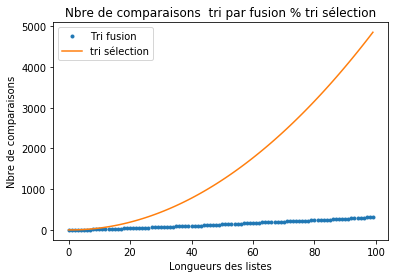

In [44]:
pylab.plot(LONGUEURS, nbre_comp_tri_fusion, '.',
           LONGUEURS, [n*(n-1)/2 for n in LONGUEURS], '-')
pylab.xlabel('Longueurs des listes')
pylab.ylabel('Nbre de comparaisons')
pylab.title('Nbre de comparaisons  tri par fusion % tri sélection')
pylab.legend(['Tri fusion', 'tri sélection'])
pylab.show()

Avec un peu d'analyse mathématique, on peut montrer que le nombre de comparaisons $c_{\mathrm{tri\_fusion}}(n)$ pour trier une liste de longueur $n$ est de la forme

$$ C_1n\log_{2}(n) \leq c_{tri\_fusion}(n) \leq C_2n\log_{2}n,$$
avec $C_1$ et $C_2$ deux constantes positives ne dépendant pas de $n$.

Le tri fusion est donc bien meilleur (en nombre de comparaisons) que le tri sélection dans tous les cas,  et que le tri insertion en moyenne et dans le pire des cas.

## Liste de tous les mots d'une longueur donnée

Le problème que l'on cherche à résoudre ici est la construction de la liste de tous les mots d'une longueur donnée réalisables avec les lettres d'un alphabet lui aussi donné.

**Exemples**

* avec l'alphabet binaire $\{0, 1\}$, les mots de longueur 3 sont au nombre de huit et sont les mots suivants :

     000, 001, 010, 011, 100, 101, 110, 111.
* avec l'alphabet de trois lettres $\{a, b, c\}$, les mots de longueur 2 sont au nombre de neuf et sont les suivants :
     
     aa, ab, ac, ba, bb, bc, ca, cb, cc.
     
Plus généralement, avec un alphabet possédant $q$ lettres, il y a $q^n$ mots de longueur $n$.

On note $A$ l'alphabet et $A^n$ l'ensemble de tous les mots de longueur $n$ réalisables avec les lettres de $A$.

Notons au passage que 

* $A^1 = A$ : les mots de longueur 1 sont les mots d'une seule lettre.
* $A^0$, ensemble des mots de longueur 0, ne contient qu'un seul mot : le mot vide.

Considérons $A^{n+1}$ l'ensemble des mots de longueur $n+1$, $n$ étant un entier naturel quelconque.

Tout mot $u\in A^{n+1}$ peut s'écrire de façon unique sous la forme

$$ u = x.u',$$
où $x\in A$ (i.e. $x$ est une lettre de $A$) et $u'\in A^n$ (i.e. $u'$ est un mot de longueur $n$).

Si nous connaissons $A^n$, l'ensemble des mots de longueur $n$, alors on peut construire $A^{n+1}$ en rajoutant en tête de tous les mots de $A^n$ toutes les lettres de $A$.

Ainsi la construction de l'ensemble des mots de longueur $n+1$ est-elle facilement accessible à partir de celle des mots de longueur $n$.

En ajoutant le cas des mots de longueur 0, nous avons l'algorithme récursif :

    ens_mots(n, A)
       si n = 0 alors
          res <- {''}
       sinon
          res <- {x.u' | x dans A et u' dans A^n}
       finsi

In [45]:
def ens_mots(long, alphabet):
    '''
    :param long: (int) longueur des mots souhaités
    :param alphabet: (iterable) l'alphabet utilisé
    :return: (set) ensemble contenant tous les mots de longueur long
    :CU: long >= 0, alphabet ne contient que des caractères
    :Exemples:
    
    >>> ens_mots(0, {'0', '1'})
    {''}
    >>> ens_mots(3, {'0', '1'}) == {'000', '001', '010', '011',
                                    '100', '101', '110', '111'}
    >>> len(ens_mots(10, {'0', '1'})) == 1024
    '''
    if long == 0:
        res = {''}
    else:
        intermediaire = ens_mots(long - 1, alphabet)
        res = set(c + mot for c in alphabet for mot in intermediaire)
    return res

In [46]:
ens_mots(3, {'0', '1'})

{'000', '001', '010', '011', '100', '101', '110', '111'}

In [47]:
len(ens_mots(10, {'0', '1'}))

1024

## Permutations

On appelle permutation des éléments d'un ensemble fini, tout arrangement en séquence sans répétition de tous ces éléments.

Par exemple, si l'ensemble considéré est constitué de trois éléments $a$, $b$ et $c$, il y a $3!=6$ permutations de ces éléments :

$$ (a, b, c),\ (a, c, b),\ (b, a, c),\ (b, c, a),\ (c, a, b),\ (c, b, a).$$

De manière générale, pour un ensemble à $n$ éléments, il y a $n!$ permutations de ces éléments.

Comment construire l'ensemble de toutes les permutations des éléments d'un ensemble donné ?

Là encore une solution récursive est relativement simple à mettre en œuvre si on réalise que si on est parvenu à construire les permutations de tous les éléments sauf un préalablement sélectionné noté $x$ dans la suite, alors on obtient les permutations de la totalité des éléments en insérant $x$ à toutes les positions de toutes les permutations des autres éléments.

Par exemple avec notre ensemble à trois éléments $a$, $b$, $c$, si on a l'ensemble des permutations de $b$ et $c$ : $\{(b, c), (c, b)\}$, alors on obtient les permutations des trois éléments 
* en insérant $a$ aux trois positions de la permutation $(b,c)$, pour obtenir les permutations $(a, b, c)$, $(b, a, c)$, $(b,c,a)$, 
* et en insérant $a$ aux trois positions de la permutation $(c,b)$, pour obtenir les permutations $(a, c, b)$, $(c, a, b)$, $(c,b,a)$.

Il reste à prendre en compte le cas de l'ensemble vide comme cas de base : il n'y a qu'une seule permutation $()$.

In [48]:
def permutations(seq):
    '''
    :param seq: (str ou tuple ou list)
    :return: (set) ensemble de toutes les permutations des éléments de seq
    :CU: aucune
    :Exemples:
    
    >>> permutations(())
    {()}
    >>> permutations('abc') == {('a', 'b', 'c'), ('a', 'c', 'b'), 
                                ('b', 'a', 'c'), ('b', 'c', 'a'),
                                ('c', 'a', 'b'), ('c', 'b', 'a')}
    >>> len(permutations([1, 2, 3, 4])) == 24
    True
    '''
    n = len(seq)
    if n == 0:
        return {()}
    else:
        intermediaire = permutations(seq[1:])
        res = set()
        for i in range(n):
            res = res.union(set(perm[:i] + (seq[0],) + perm[i:] 
                                for perm in intermediaire))
    return res

In [49]:
permutations('')

{()}

In [50]:
permutations('abc')

{('a', 'b', 'c'),
 ('a', 'c', 'b'),
 ('b', 'a', 'c'),
 ('b', 'c', 'a'),
 ('c', 'a', 'b'),
 ('c', 'b', 'a')}

In [51]:
len(permutations([1, 2, 3, 4]))

24